In [30]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [31]:
df = pd.read_csv("C:/Users/Asus/Downloads/Dataset/spam SMS.csv", encoding="latin1")

In [32]:
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [33]:
df.select_dtypes(include="object").columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [34]:
df.shape

(5572, 5)

In [35]:
print(df["Unnamed: 2"].isnull().sum())
print(df["Unnamed: 3"].isnull().sum())
print(df["Unnamed: 4"].isnull().sum())

5522
5560
5566


In [36]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [37]:
df.rename(columns={"v1": "level", "v2":"text"}, inplace=True)

In [38]:
df["level_num"] = df["level"].map({"ham":0 , "spam":1})

In [39]:
# df.isnull().sum()

In [40]:
x =  df["text"]
y = df["level_num"]

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
tfv = TfidfVectorizer(stop_words="english", max_features=3000)
x_train_tfv = tfv.fit_transform(x_train)
x_test_tfv = tfv.transform(x_test)

In [45]:
from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import SVC

In [46]:
# sv = SVC()
# sv.fit(x_train_tfv, y_train)

In [47]:
mnb = MultinomialNB()
mnb.fit(x_train_tfv, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [48]:
y_pred = mnb.predict(x_test_tfv)

In [49]:
# mnb.score(x_train_tfv, y_train)*100 , mnb.score(x_test_tfv, y_test)*100

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [51]:
print("Accuracy", accuracy_score(y_test, y_pred))
print("Confusion Matrix", confusion_matrix(y_test, y_pred))
print("Classicifation Report", classification_report(y_test, y_pred))

Accuracy 0.97847533632287
Confusion Matrix [[965   0]
 [ 24 126]]
Classicifation Report               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



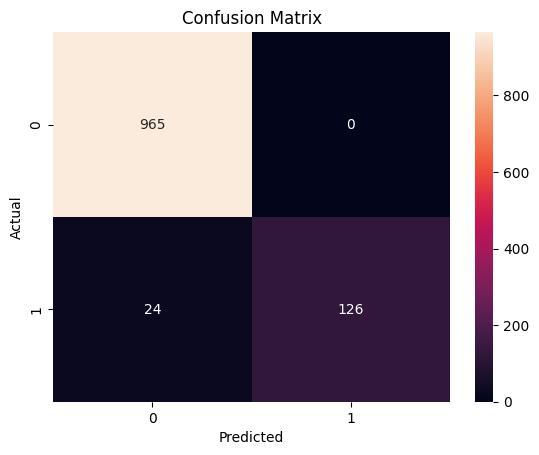

In [52]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [53]:
def predict_message(msg):
    msg_tfv = tfv.transform([msg])
    pred = mnb.predict(msg_tfv)[0]
    return "Spam" if pred == 1 else "Ham (Not Sapm)"

print(predict_message("Congratulations! You won a lottery. Call now!"))
print(predict_message("Hi, what are you doing today?"))

Spam
Ham (Not Sapm)
